In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
from arch import arch_model

In [7]:
import matplotlib.pyplot as plt

In [15]:
data=pd.read_pickle("nifty_data_2019_2022.bz2")
data.head()

,spot_open,spot_high,spot_low,spot_close,Expiry,futures_close
Date,,,,,,
2019-01-01,10881.70,10923.60,10807.10,10910.10,2019-01-31,10960.55
2019-01-02,10868.85,10895.35,10735.05,10792.50,2019-01-31,10830.85
2019-01-03,10796.80,10814.05,10661.25,10672.25,2019-01-31,10718.50
2019-01-04,10699.70,10741.05,10628.65,10727.35,2019-01-31,10777.60
2019-01-07,10804.85,10835.95,10750.15,10771.80,2019-01-31,10803.45


In [ ]:
SP500_data['Adj Close'].plot(figsize=(10, 7))
# Set title and labels for the plot
plt.title('S&P 500 Index', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.plot()
plt.legend(['S&P 500 Index'])
plt.show()

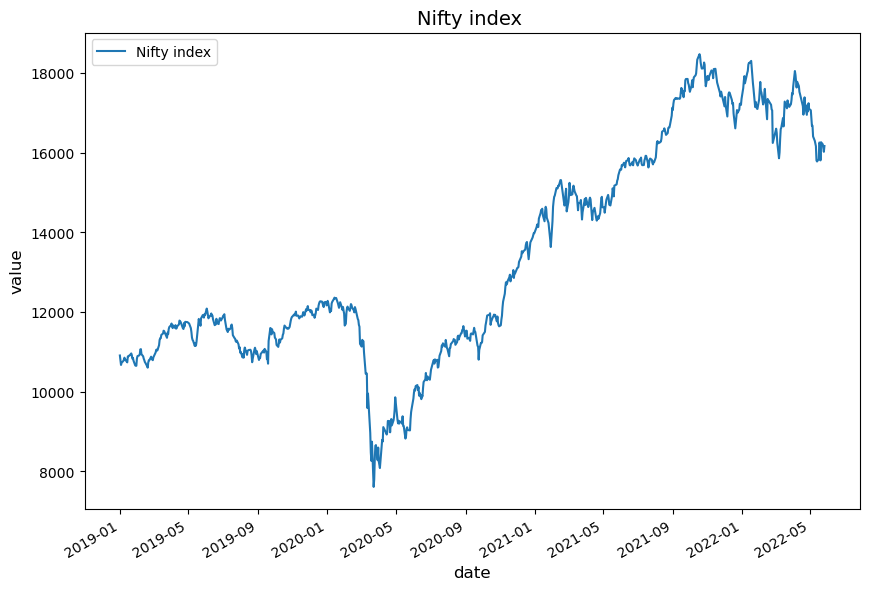

In [17]:
data['spot_close'].plot(figsize=(10,7)) 
#set title and labels for the plot 
plt.title('Nifty index ',fontsize=14)
plt.xlabel('date',fontsize=12)
plt.ylabel('value',fontsize=12)
plt.plot()
plt.legend(['Nifty index'])
plt.show()

In [19]:
data['log_returns']=np.log(data['spot_close'].pct_change()+1)*100 
data=data.dropna()

In [21]:
data.head()

,spot_open,spot_high,spot_low,spot_close,Expiry,futures_close,log_returns
Date,,,,,,,
2019-01-02,10868.85,10895.35,10735.05,10792.50,2019-01-31,10830.85,-1.083752
2019-01-03,10796.80,10814.05,10661.25,10672.25,2019-01-31,10718.50,-1.120453
2019-01-04,10699.70,10741.05,10628.65,10727.35,2019-01-31,10777.60,0.514964
2019-01-07,10804.85,10835.95,10750.15,10771.80,2019-01-31,10803.45,0.413505
2019-01-08,10786.25,10818.45,10733.25,10802.15,2019-01-31,10844.65,0.281358


In [ ]:
SP500_data['log_returns'].plot(figsize=(10, 7))
# Set title and labels for the plot
plt.title('S&P 500 Log Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Returns', fontsize=12)
plt.legend(['S&P 500 Log Returns'])
plt.show()

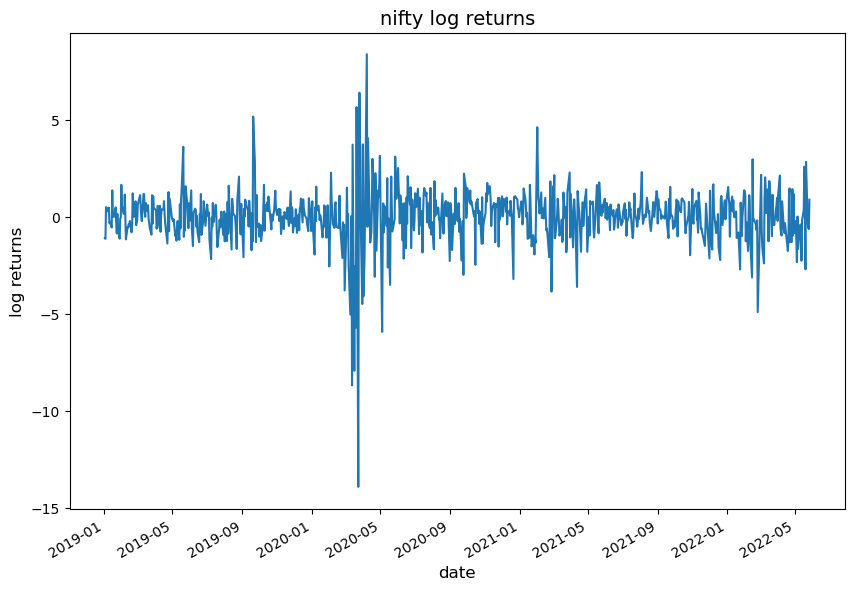

In [25]:
data['log_returns'].plot(figsize=(10,7))
#set title and labels for the plot 
plt.title('nifty log returns',fontsize=14)
plt.xlabel('date',fontsize=12)
plt.ylabel('log returns',fontsize=12)
plt.show()

In [ ]:
# Annualised volatilty
SP500_data['actual_historical_volatility'] = SP500_data['log_returns'].rolling(14).std() * ((252)**0.5)

# Print the last 5 rows
SP500_data.round(2).tail()

In [29]:
data['actual_historical_volatility']=data['log_returns'].rolling(14).std()*((252)**0.5) 

data.round(2).tail()

,spot_open,spot_high,spot_low,spot_close,Expiry,futures_close,log_returns,actual_historical_volatility
Date,,,,,,,,
2022-05-20,16043.80,16283.05,16003.85,16266.15,2022-05-26,16253.25,2.85,25.84
2022-05-23,16290.95,16414.70,16185.75,16214.70,2022-05-26,16183.35,-0.32,25.83
2022-05-24,16225.55,16262.80,16078.60,16125.15,2022-05-26,16104.70,-0.55,24.28
2022-05-25,16196.35,16223.35,16006.95,16025.80,2022-05-26,16013.80,-0.62,24.29
2022-05-26,16105.00,16204.45,15903.70,16170.15,2022-05-26,16159.05,0.90,23.94


In [33]:
data.tail()

,spot_open,spot_high,spot_low,spot_close,Expiry,futures_close,log_returns,actual_historical_volatility
Date,,,,,,,,
2022-05-20,16043.80,16283.05,16003.85,16266.15,2022-05-26,16253.25,2.848156,25.836694
2022-05-23,16290.95,16414.70,16185.75,16214.70,2022-05-26,16183.35,-0.316802,25.827050
2022-05-24,16225.55,16262.80,16078.60,16125.15,2022-05-26,16104.70,-0.553807,24.277895
2022-05-25,16196.35,16223.35,16006.95,16025.80,2022-05-26,16013.80,-0.618024,24.293473
2022-05-26,16105.00,16204.45,15903.70,16170.15,2022-05-26,16159.05,0.896703,23.935699


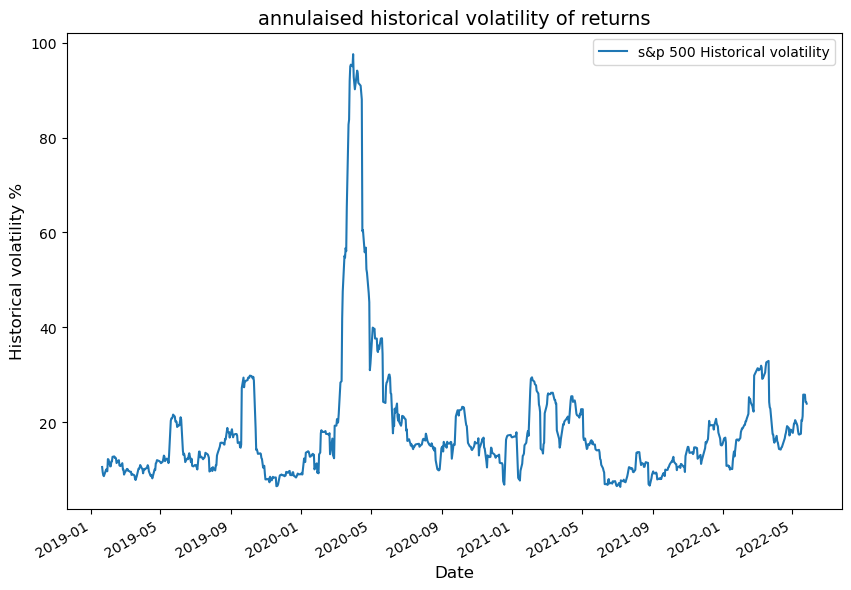

In [39]:
data['actual_historical_volatility'].plot(figsize=(10,7))
plt.title('annulaised historical volatility of returns',fontsize=14) 
plt.xlabel('Date',fontsize=12)
plt.ylabel('Historical volatility %',fontsize=12)
plt.legend(['s&p 500 Historical volatility']) 
plt.show()

In [47]:
# Function to predict the volatility of 1 day
def predict_volatility(hist_returns_data):
    # Define model
    gm = arch_model(hist_returns_data, vol='ARCH', p=1, dist='skewt')

    # Fit the model
    gm_fit = gm.fit(disp='off') 
    
    # Make forecast
    forecasted_variance = gm_fit.forecast(horizon=1).variance.values[-1]

    # Forecasted volatility
    forecasted_volatility = forecasted_variance**0.5

    # Calculate and return the annualised forecasted variance
    annualised_volatility = forecasted_volatility * (252**0.5)
    return annualised_volatility

# Calculate the ARCH predicted volatility for the each day    
data['ARCH_predicted_volatility'] = data['log_returns'].rolling(252).apply(predict_volatility, raw=True)

# Shift the ARCH predicted volatility to match with the actual historical volatility on each day    
data['ARCH_predicted_volatility'] = data['ARCH_predicted_volatility'].shift(1)

In [49]:
# Showing an example of the normal market scenario
data[['log_returns','ARCH_predicted_volatility', 'actual_historical_volatility']].dropna()[30:35].round(2)

,log_returns,ARCH_predicted_volatility,actual_historical_volatility
Date,,,
2020-02-24,-2.10,13.20,16.58
2020-02-25,-0.27,16.02,13.13
2020-02-26,-1.02,13.41,12.77
2020-02-27,-0.39,14.01,12.43
2020-02-28,-3.78,13.48,19.30


In [51]:
# Showing an example of the adverse market scenario
data[['log_returns','ARCH_predicted_volatility', 'actual_historical_volatility']].dropna()[40:45].round(2)

,log_returns,ARCH_predicted_volatility,actual_historical_volatility
Date,,,
2020-03-09,-5.02,16.91,28.39
2020-03-11,0.07,28.26,28.67
2020-03-12,-8.67,14.90,41.85
2020-03-13,3.74,38.43,47.57
2020-03-16,-7.92,26.34,55.08
